Home Credit Default Risk Analysis 
Dimitar Vlassarev 2018

# Imports and Data Loading

## Load Libraries

In [21]:
import kaggle as kg
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from PIL import  Image
%matplotlib inline

## Download and Import Data

In [2]:
# Download from Kaggle
kg.api.competition_download_files("home-credit-default-risk", "data")

In [3]:
# Load data into dataframes
application_train     = pd.read_csv(r"data/application_train.csv.zip")
application_test      = pd.read_csv(r"data/application_test.csv.zip")
bureau                = pd.read_csv(r"data/bureau.csv.zip")
bureau_balance        = pd.read_csv(r"data/bureau_balance.csv.zip")
credit_card_balance   = pd.read_csv(r"data/credit_card_balance.csv.zip")
installments_payments = pd.read_csv(r"data/installments_payments.csv.zip")
pos_cash_balance      = pd.read_csv(r"data/POS_CASH_balance.csv.zip")
previous_application  = pd.read_csv(r"data/previous_application.csv.zip")

# Exploratory Data Analysis
EDA based on: https://www.kaggle.com/pavanraj159/loan-repayers-v-s-loan-defaulters-home-credit

## Data Dimensions

In [4]:
print ("application_train     :", application_train.shape)
print ("application_test      :", application_test.shape)
print ("bureau                :", bureau.shape)
print ("bureau_balance        :", bureau_balance.shape)
print ("credit_card_balance   :", credit_card_balance.shape)
print ("installments_payments :", installments_payments.shape)
print ("pos_cash_balance      :", pos_cash_balance.shape)
print ("previous_application  :", previous_application.shape)

application_train     : (307511, 122)
application_test      : (48744, 121)
bureau                : (1716428, 17)
bureau_balance        : (27299925, 3)
credit_card_balance   : (3840312, 23)
installments_payments : (13605401, 8)
pos_cash_balance      : (10001358, 8)
previous_application  : (1670214, 37)


## First Few Rows

In [5]:
display("application_train")
display(application_train.head(3))
display("application_test")
display(application_test.head(3))
display("bureau")
display(bureau.head(3))
display("bureau_balance")
display(bureau_balance.head(3))
display("credit_card_balance")
display(credit_card_balance.head(3))
display("installments_payments")
display(installments_payments.head(3))
display("pos_cash_balance")
display(pos_cash_balance.head(3))
display("previous_application")
display(previous_application.head(3))

'application_train'

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


'application_test'

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


'bureau'

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN


'bureau_balance'

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C


'credit_card_balance'

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0


'installments_payments'

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000


'pos_cash_balance'

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0


'previous_application'

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


## Data Schema

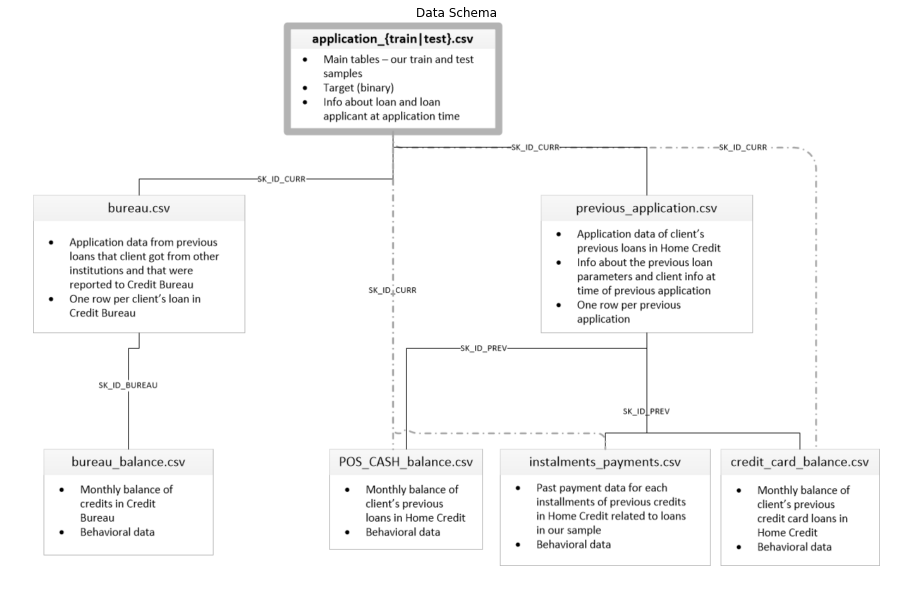

In [28]:
image = np.array(Image.open(r"static/home_credit.png"))
fig = plt.figure(figsize=(20,10))
plt.imshow(image,interpolation="bilinear")
plt.axis("off")
_ = plt.title("Data Schema")

## Missing Data Analysis

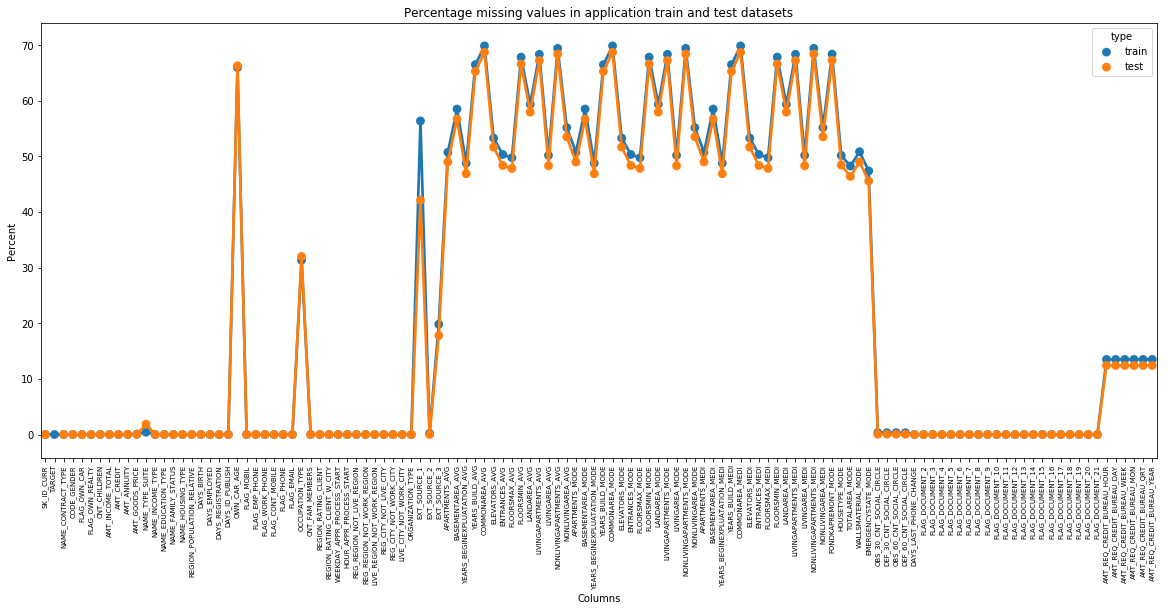

In [27]:
# Prep train-test data
miss_train = pd.DataFrame((application_train.isnull().sum()) * 100 / application_train.shape[0]).reset_index()
miss_test  = pd.DataFrame((application_test.isnull().sum()) * 100 / application_test.shape[0]).reset_index()
miss_train["type"] = "train"
miss_test["type"]  =  "test"
missing = pd.concat([miss_train, miss_test], axis=0)

# Plot misssing data vs column
fig = plt.figure(figsize=(20, 8))
ax = sns.pointplot("index", 0, data=missing, hue="type")
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage missing values in application train and test datasets")
plt.ylabel("Percent")
_ = plt.xlabel("Columns")

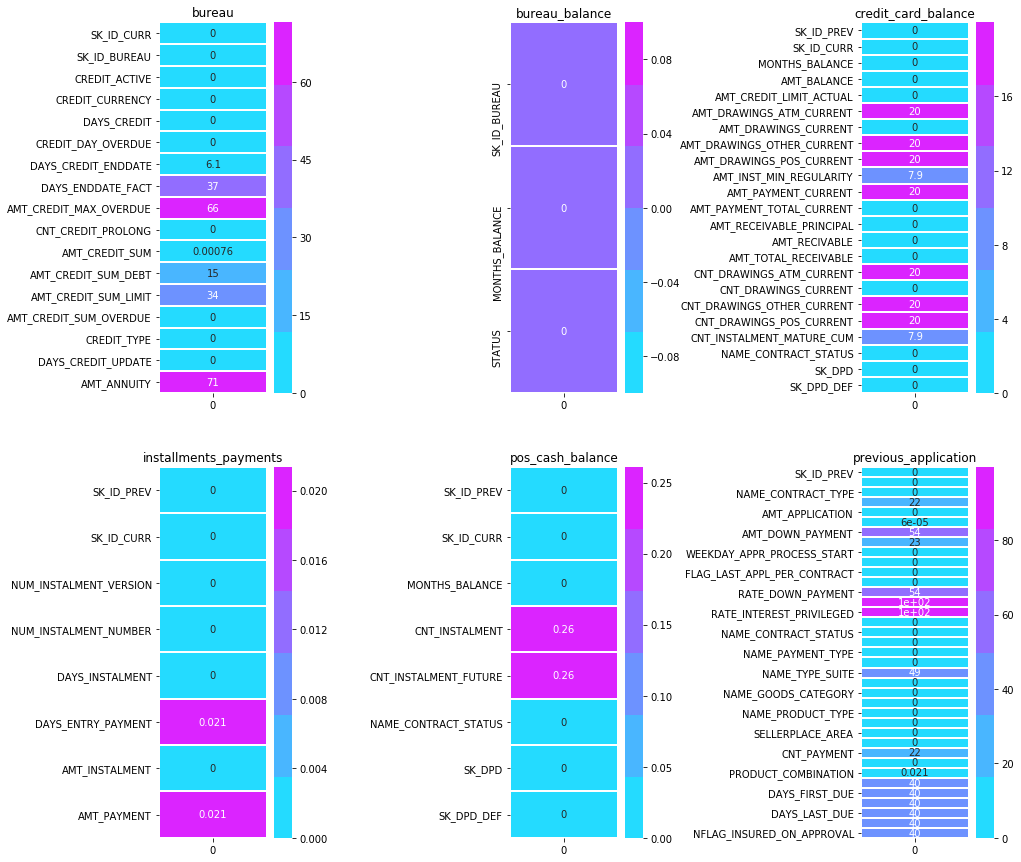

In [30]:
plt.figure(figsize=(15,15))

# Bureau data
plt.subplot(231)
sns.heatmap(pd.DataFrame(bureau.isnull().sum() / bureau.shape[0] * 100), annot=True,
            cmap=sns.color_palette("cool"), linewidth=1, linecolor="white")
plt.title("bureau")

# Bureau balance data
plt.subplot(232)
sns.heatmap(pd.DataFrame(bureau_balance.isnull().sum() / bureau_balance.shape[0] * 100), annot=True,
            cmap=sns.color_palette("cool"), linewidth=1, linecolor="white")
plt.title("bureau_balance")

# Credit card balance
plt.subplot(233)
sns.heatmap(pd.DataFrame(credit_card_balance.isnull().sum() / credit_card_balance.shape[0] * 100), annot=True,
            cmap=sns.color_palette("cool"), linewidth=1, linecolor="white")
plt.title("credit_card_balance")

# Installments payments
plt.subplot(234)
sns.heatmap(pd.DataFrame(installments_payments.isnull().sum() / installments_payments.shape[0] * 100), annot=True,
            cmap=sns.color_palette("cool"), linewidth=1, linecolor="white")
plt.title("installments_payments")

# Cash balance
plt.subplot(235)
sns.heatmap(pd.DataFrame(pos_cash_balance.isnull().sum() / pos_cash_balance.shape[0] * 100), annot=True,
            cmap=sns.color_palette("cool"), linewidth=1, linecolor="white")
plt.title("pos_cash_balance")

# Previous Application
plt.subplot(236)
sns.heatmap(pd.DataFrame(previous_application.isnull().sum() / previous_application.shape[0] * 100), annot=True,
            cmap=sns.color_palette("cool"), linewidth=1, linecolor="white")
plt.title("previous_application")

plt.subplots_adjust(wspace = 1.6)